### Для начала займемся выводом основной информации о датасете: информация о типах данных, число пропусков, средние значения:

In [26]:
import pandas as pd

df = pd.read_csv('/content/.config/train.csv')

# 1 Информация о типах данных и количестве пропусков
print("Информация о датасете:")
df.info()

# 2 Число пропусков в каждой колонке
print("\nКоличество пропущенных значений в каждой колонке:")
display(df.isnull().sum())

# 3 Статистические данные (средние значения и другие показатели)
print("\nОсновные статистические показатели:")
display(df.describe())

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Количество пропущенных значений в каждой колонке:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0



Основные статистические показатели:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Теперь мы можем посчитать процент выживаемости у каждого класса пассажиров:

In [27]:
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print(survival_rate_by_class)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


### Самое популярное мужское и самое популярное женское имя на корабле:

In [28]:
def extract_first_name(full_name):
    if '(' in full_name:
        first_name = full_name.split('(')[1].split(')')[0].split()[0]
    else:
        first_name = full_name.split('.')[1].strip().split()[0]
    return first_name

df['FirstName'] = df['Name'].apply(extract_first_name)

# Самое популярное мужское и женское имя
popular_male_name = df[df['Sex'] == 'male']['FirstName'].mode()[0]
popular_female_name = df[df['Sex'] == 'female']['FirstName'].mode()[0]

print(f"Самое популярное мужское имя: {popular_male_name}")
print(f"Самое популярное женское имя: {popular_female_name}")

Самое популярное мужское имя: William
Самое популярное женское имя: Anna


### Самое популярное мужское и самое популярное женское имя на корабле в каждом классе:

In [29]:
popular_names_by_class = {}
for pclass in df['Pclass'].unique():
    male_name = df[(df['Pclass'] == pclass) & (df['Sex'] == 'male')]['FirstName'].mode()[0]
    female_name = df[(df['Pclass'] == pclass) & (df['Sex'] == 'female')]['FirstName'].mode()[0]
    popular_names_by_class[pclass] = {'male': male_name, 'female': female_name}

# Чтобы читалось лучше)
for pclass, names in popular_names_by_class.items():
    print(f"Класс {pclass}:")
    print(f"  Самое популярное мужское имя: {names['male']}")
    print(f"  Самое популярное женское имя: {names['female']}")
    print("-" * 40)

Класс 3:
  Самое популярное мужское имя: William
  Самое популярное женское имя: Anna
----------------------------------------
Класс 1:
  Самое популярное мужское имя: William
  Самое популярное женское имя: Elizabeth
----------------------------------------
Класс 2:
  Самое популярное мужское имя: William
  Самое популярное женское имя: Elizabeth
----------------------------------------


### Часть таблицы с пассажирами, возраст которых больше 44 лет:



In [30]:
passengers_older_than_44 = df[df['Age'] > 44]
display(passengers_older_than_44)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Timothy
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Elizabeth
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,Mary
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,Edward
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,Myna
...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,Peter
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,Margaret
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Sallie
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S,Victor


### Часть таблицы с пассажирами, возраст которых меньше 44 лет и которые мужского пола:

In [31]:
male_passengers_younger_than_44 = df[(df['Age'] < 44) & (df['Sex'] == 'male')]
display(male_passengers_younger_than_44)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S,Owen
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S,William
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S,Gosta
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.050,NaN,S,William
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,Anders
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.500,NaN,S,Frederick
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,Henry
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S,Juozas
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C,Karl


### Количества n-местных кабин (в которых было 2, 3, 4, ... человека):

In [32]:
cabin_exploded['Cabin'] = cabin_exploded['Cabin'].str.replace(r"[\[\]']", '', regex=True).str.strip()
cabin_exploded = cabin_exploded[cabin_exploded['Cabin'] != ""]
cabin_counts = cabin_exploded['Cabin'].value_counts()
cabin_counts_filtered = cabin_counts[cabin_counts >= 2]

print(f"Общее количество кабин, в которых было 2 или более человек: {len(cabin_counts_filtered)}")

Общее количество кабин, в которых было 2 или более человек: 58


##### *P.S. После такого можно и титаник пересмотреть*

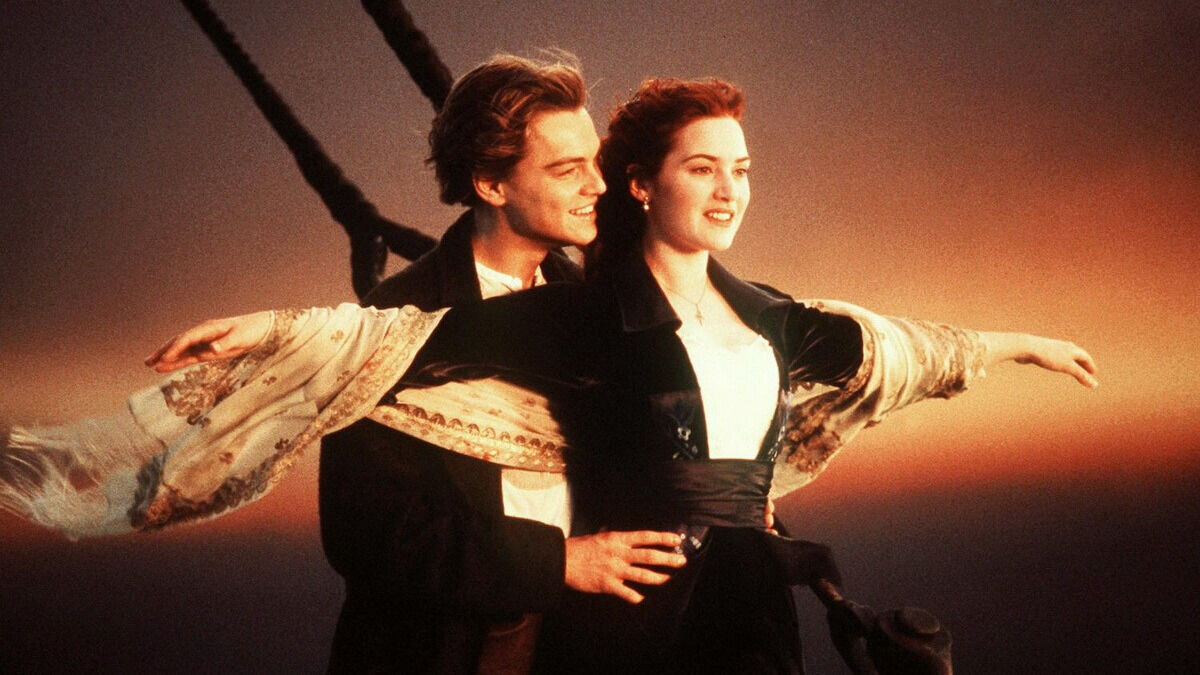